<a href="https://colab.research.google.com/github/Tomokish/Floyd-Algorithm-Assignment/blob/main/Machine_Learning_Project_Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
# 1. Perform Data Quality Check

In [127]:
# Check the Data for Missing Values

In [128]:
import pandas as pd
import numpy as np

In [129]:
# Load the Dataset

In [130]:
df= pd.read_excel("hr_comma_sep.xlsx")

In [131]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [132]:
# Check for Missing Values

In [133]:
missing_values = df.isnull().sum()

In [134]:
print("Missing values :\n",missing_values)

Missing values :
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [135]:
# Check Data types

In [136]:
print("Data types :\n", df.dtypes)

Data types :
 satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


In [137]:
# 2- Exploratory Data Analysis (EDA)

In [138]:
# We need to understand factors that contributed to employee turnover by performing EDA

In [139]:
# 2.1- Draw Heatmap of the correlation matrix between all numerical featufres

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt


In [141]:
# Convert the non-numerical values in the dataset to numerical data

In [142]:
# Print out the columns name

In [143]:
col_names = df.columns.tolist()

In [144]:
print("columns name: ")
print(col_names)
print("Sample data: ")

columns name: 
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']
Sample data: 


In [145]:
# Identify Non-Numerica Columns

In [146]:
non_numeric_columns = df.select_dtypes(include=['object', 'category',]).columns

In [147]:
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['sales', 'salary'], dtype='object')


In [148]:
# Convert Non-numeric column to numeric, forcing errors to NaN

In [149]:
df[non_numeric_columns] = df[non_numeric_columns].apply(pd.to_numeric, errors = 'coerce')

In [150]:
# To drop row with null values if it exist. Handling NaNs

In [151]:
# Dataframe before dropping the NaN Column

In [152]:
print(df)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [156]:
# We need to drop the Non-Numeric Columns

In [157]:
df = df.drop(columns=non_numeric_columns)

In [159]:
# Print Dataframe after dropping the Non-numeric columns

In [160]:
print("n\Dataframe after dropping non-numeric columns:")

n\Dataframe after dropping non-numeric columns:


In [161]:
print(df)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [162]:
# We now need to compute and calculate the Correlation Matrix

In [163]:
correlation_matrix = df.corr()

In [164]:
print(correlation_matrix)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

In [165]:
# Draw the Heatmap

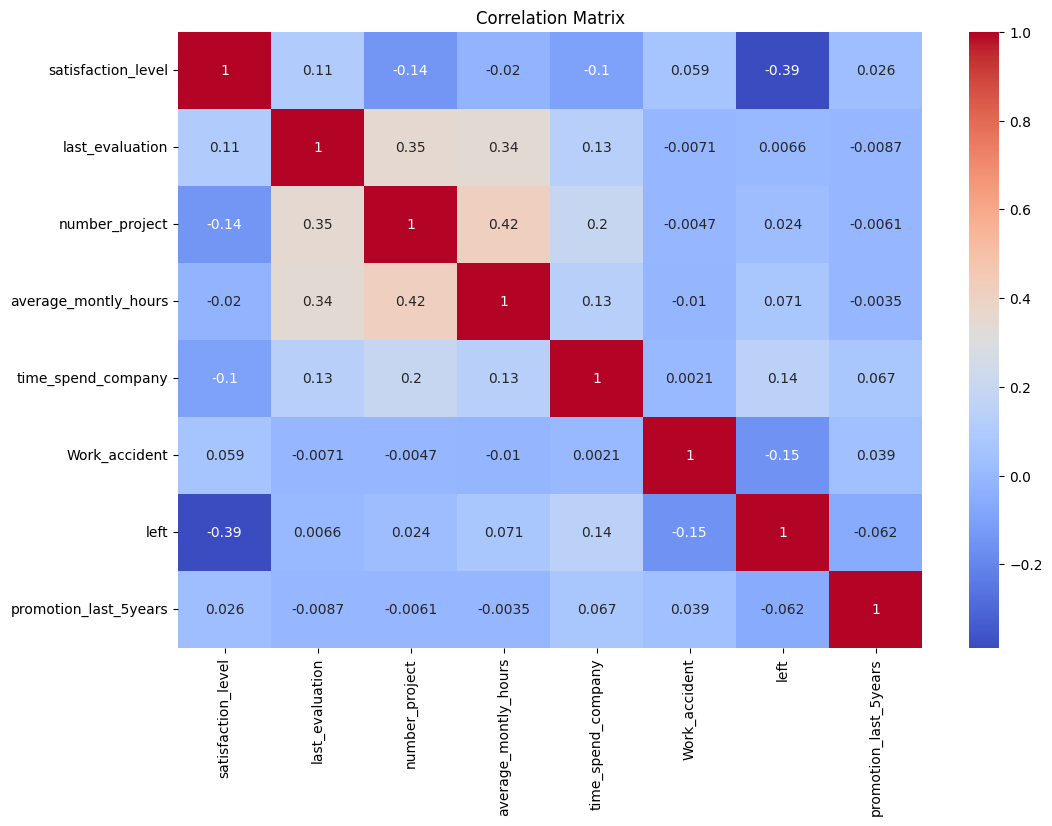

In [166]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [167]:
# 2.2 - Draw Distribution Plots

In [168]:
# Employee Satisfaction

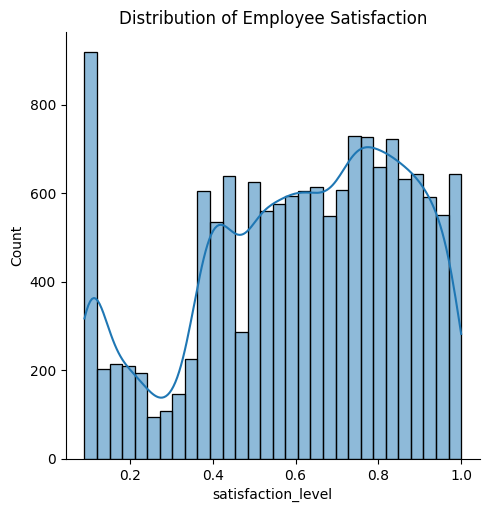

In [169]:
sns.displot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Employee Satisfaction')
plt.show()

In [170]:
# Employee Evaluation

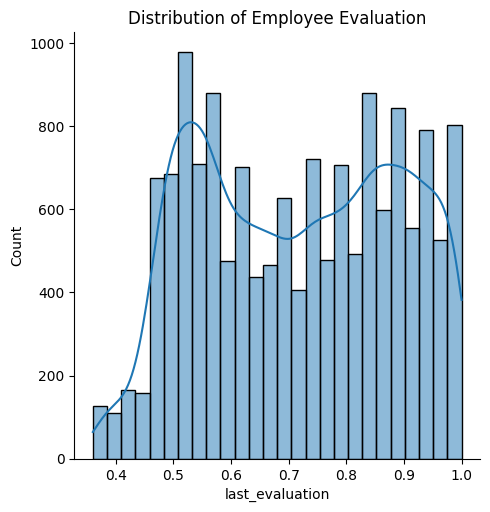

In [171]:
sns.displot(df['last_evaluation'],kde=True)
plt.title('Distribution of Employee Evaluation')
plt.show()

In [172]:
# Employee Average Monthly Hour

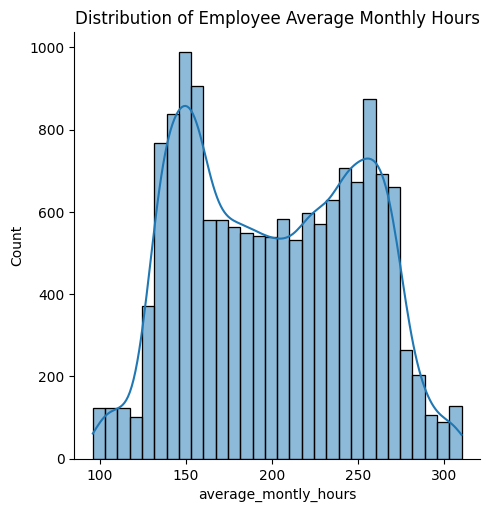

In [173]:
sns.displot(df['average_montly_hours'], kde=True)
plt.title('Distribution of Employee Average Monthly Hours')
plt.show()